## Creating the Environment

In [1]:
import gymnasium as gym
import pygame
import numpy as np
from IPython.display import clear_output
from IPython import display
import random
import matplotlib.pylab as plt
import copy
import time

In [2]:
class SimpleCorridor(gym.Env):
    def __init__(self, size=15):
        self.length = size
        self.start_pos = 12
        self.end_pos = 5
        self.action_space = gym.spaces.Discrete(2)
        self.observation_space = gym.spaces.Box(
            0.0, self.length, shape=(2,), dtype=int)
        self.mode = "rgb_array"
        self.width = 20

    def reset(self):
        self.current_pos = self.start_pos
        return np.array([self.current_pos, self.end_pos])

    def step(self, action):
        if action == 0 and self.current_pos > 0:
            self.current_pos -= 1
        if action == 1 and self.current_pos < self.length - 1:
            self.current_pos += 1
        done = self.current_pos == self.end_pos
        reward = 1 if done else -1
        info = {}
        return np.array([self.current_pos, self.end_pos]), reward, done, info

    def simulate_step(self, tpos, action):
        if action == 0 and tpos > 0:
            tpos -= 1
        if action == 1 and tpos < self.length -1:
            tpos += 1
            
        done = tpos == self.end_pos
        reward = 1 if done else -1
        info = {}
        return tpos, reward, done, info
        
    def render(self, mode="rgb_array"):
        canvas = pygame.Surface((self.width, self.width * self.length + 1))
        canvas.fill((255,255,255))
        for i in range(self.length+1):
            pygame.draw.line(canvas, 0, (0, 20*(i)), (20, 20*(i)), width=1)
        pygame.draw.line(canvas, 0, (0,0), (0, 20*(i)), width=1)
        pygame.draw.line(canvas, 0, (19,0), (19, 20*(i)), width=1)
        pygame.draw.circle(canvas, (0, 0, 255), (10,self.current_pos*20+10), 7)
        pygame.draw.circle(canvas, (255, 0, 0), (10,(self.end_pos)*20+10), 7)
        plArray = np.array(pygame.surfarray.pixels3d(canvas))
        plt.imshow(plArray)        
        plt.axis("off")


# Initialize the env 

In [3]:
env = SimpleCorridor()

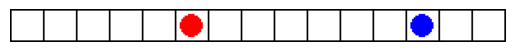

In [4]:
env.reset()
env.render()

## Defining the policy

In [5]:
policy_probs = np.full((15,2),0.5)
print(policy_probs)


[[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]


In [6]:
def policy(cur_pos):
    return policy_probs[cur_pos]


### Testing the policy with state (0)

In [7]:
action_probablities = policy(0)
for action, prob in zip(range(2), action_probablities):
    print(f"Probablity of taking action {action}: {prob}")

Probablity of taking action 0: 0.5
Probablity of taking action 1: 0.5


## The test agent function

In [8]:
def test_agent(env: gym.Env, policy: callable, episodes: int = 10) -> None: 
    for episode in range(episodes):
        temp = env.reset()
        tagent_pos = temp[0]
        ttarget_pos = temp[1]
        done = False  
       
        env.render(mode="rgb_array")
        while not done:
            p = policy(tagent_pos)
            action = np.random.choice(2,p=p)

            next_state, _, done, _ = env.step(action)
            env.render()
            plt.axis('off')
            display.display(plt.gcf())
            display.clear_output(wait=True)
            
            
            tagent_pos = next_state[0]

# Defining the value table

In [9]:
state_values = np.zeros(15)

In [10]:
print(state_values)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Testing the agent with the random policy

In [11]:
#test_agent(env, policy)

## Implementing the Value iteration Algoritm

In [12]:
def value_iteration(policy_probs, state_values, theta = 1e-6, gamma = 0.99):
    delta = float("inf")

    while delta > theta: 
        delta = 0

        for pos in range(15):
            old_value = state_values[pos]
            action_probs = None
            max_qsa = float("-inf")

            for action in range(2):
                next_state, reward, _,_ = env.simulate_step(pos, action)
                qsa = reward + gamma * state_values[next_state]
            
                if qsa > max_qsa:
                    max_qsa = qsa
                    action_probs = np.zeros(2)
                    action_probs[action] = 1

            state_values[pos] = max_qsa
            policy_probs[pos] = action_probs
            delta = max(delta, abs(max_qsa - old_value))

In [13]:
value_iteration(policy_probs, state_values)

In [14]:
print(state_values)

[-3.45763847 -2.48246409 -1.49743945 -0.50246505  0.5025596  -0.502466
  0.50255866 -0.50246692 -1.49744225 -2.48246783 -3.45764315 -4.42306672
 -5.37883605 -6.32504769 -7.26179722]


In [15]:
print(policy_probs)


[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


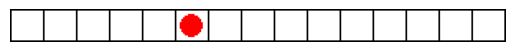

In [16]:
test_agent(env, policy)